In [0]:
import pandas as pd
from google.colab import drive
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

drive.mount("/content/drive",force_remount=True)
csv_file =  '/content/drive/My Drive/Colab Notebooks/ISI/events.csv'
df = pd.read_csv(csv_file)
## This script  reads events from csv file and reads only for bamboo users

Mounted at /content/drive


In [0]:
#Counting total integrity errors that occurred in the data only in bamboo users
integrity_err_count = df['checksum_failure'].sum()
print("Total integrity errors ",integrity_err_count)
print(df.columns)

Total integrity errors  183
Index(['job_type', 'dest_proto_host', 'actual_checksum', '_id', 'origin_id',
       'source_id', 'retry_attempt', 'user_submit', 'start_time', '_type',
       'job_exitcode', 'root_xwf_id', 'user_remote', '_index', 'local_dur',
       'executable', 'execution_site', 'expected_checksum', 'filename',
       'end_time', 'job_id', 'source_proto_host', '@timestamp',
       'execution_hostname', 'submit_hostname', 'checksum_failure'],
      dtype='object')


In [0]:
print(df.head())

   job_type          dest_proto_host  \
0         2  gsiftp://bamboo.isi.edu   
1         1        compute-2.isi.edu   
2         1        compute-2.isi.edu   
3         1        compute-2.isi.edu   
4         2  gsiftp://obelix.isi.edu   

                                     actual_checksum  _id  \
0                                                NaN    1   
1                                                NaN    2   
2                                                NaN    3   
3  c32f0fcafa766cd79f6d9aef720665322b921095f6aa45...    4   
4                                                NaN    5   

                                  origin_id  \
0  9f79dced1982ca1e18ba4e9232867a03495a150f   
1  5a443e38d8d19dcdcb02c365f4da10fb08ea2cf0   
2  5a443e38d8d19dcdcb02c365f4da10fb08ea2cf0   
3  5a443e38d8d19dcdcb02c365f4da10fb08ea2cf0   
4  d714a97ccb867160a7b8696d8c579ca6e9a4dd35   

                                  source_id  retry_attempt user_submit  \
0  9f79dced1982ca1e18ba4e9232867a03

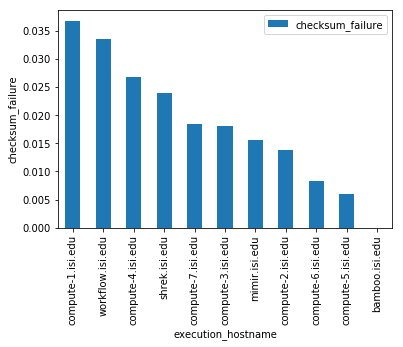

In [0]:
#hosts where integrity error occurred mostly
top_integrity_err_exec_host = df.groupby(["execution_hostname"])["checksum_failure"].agg('mean').sort_values(ascending=False)#.filter(lambda x :x["checksum__failure"]!=0)
#top_integrity_err_exec_host =pd.DataFrame(index=top_integrity_err_exec_host.index,values=top_integrity_err_exec_host)
top_integrity_err_exec_host
top_integrity_err_exec_host.plot.bar()
import matplotlib.pyplot as plt  
# # plot between 2 attributes 


plt.xlabel("execution_hostname") 
plt.ylabel("checksum_failure") 
plt.legend()
plt.show() 
#This chart denotes % of events (y-axis) occurring at the execution_site(on x_axis) having checksum failure  

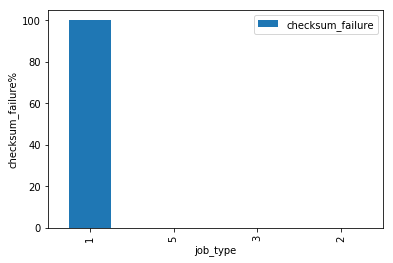

In [0]:
#job types where integrity errors occurred
top_integrity_err_jobtype = df.groupby(["job_type"])["checksum_failure"].agg('sum').apply(lambda x:x/integrity_err_count*100).sort_values(ascending=False)#.filter(lambda x :x["checksum__failure"]!=0)
top_integrity_err_jobtype.plot.bar()
import matplotlib.pyplot as plt  
# # plot between 2 attributes 


plt.xlabel("job_type") 
plt.ylabel("checksum_failure%") 
plt.legend()
plt.show() 

#This chart denotes of all the checksum failure in collected data how many checksum failures had a specific job_type, so all the failures have job_type 1

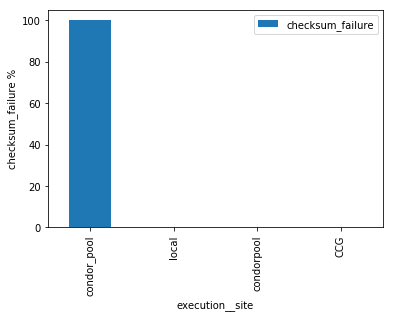

In [0]:
#execution sites where integrity errors occurred
top_integrity_err_jobtype = df.groupby(["execution_site"])["checksum_failure"].agg('sum').apply(lambda x:x/integrity_err_count*100).sort_values(ascending=False)#.filter(lambda x :x["checksum__failure"]!=0)
top_integrity_err_jobtype.plot.bar()
import matplotlib.pyplot as plt  
# # plot between 2 attributes 


plt.xlabel("execution__site") 
plt.ylabel("checksum_failure %") 
plt.legend()
plt.show() 

#This chart denotes of all the checksum failure in collected data how many checksum failures had a specific execution_site, 
#so 100% checksum failures occur at site condor_pool 

In [0]:
top_integrity_err_root = df.groupby(["filename","actual_checksum","execution_hostname"])["checksum_failure"].agg('sum').reset_index().sort_values(by = ["checksum_failure"],ascending = False)#.filter(lambda x :x["checksum__failure"]!=0)
top_integrity_err_root = top_integrity_err_root[top_integrity_err_root["checksum_failure"]>0]
top_integrity_err_root

,filename,actual_checksum,execution_hostname,checksum_failure
132,keg,c32f0fcafa766cd79f6d9aef720665322b921095f6aa45...,compute-7.isi.edu,13
134,keg,c32f0fcafa766cd79f6d9aef720665322b921095f6aa45...,shrek.isi.edu,11
131,keg,c32f0fcafa766cd79f6d9aef720665322b921095f6aa45...,compute-6.isi.edu,10
135,keg,c32f0fcafa766cd79f6d9aef720665322b921095f6aa45...,workflow.isi.edu,7
133,keg,c32f0fcafa766cd79f6d9aef720665322b921095f6aa45...,mimir.isi.edu,5
126,keg,c32f0fcafa766cd79f6d9aef720665322b921095f6aa45...,compute-1.isi.edu,4
104,1-7-2.data,5215c8c6a3456a2eb9dab15568c4de5177a8ebbd73fd1d...,compute-6.isi.edu,2
83,1-45-1.data,95244359b6f5ccc73617e588ce5999284a4bcf15276762...,compute-6.isi.edu,2
55,1-36-1.data,fb1b5a602942f71e0d2a2939a069417d2e98724a797fa0...,compute-7.isi.edu,2
74,1-41-2.data,fb1b5a602942f71e0d2a2939a069417d2e98724a797fa0...,compute-6.isi.edu,1


In [21]:
#for each workflow what are the execution hosts where integrity errors occurred
top_integrity_err_exec_host = df.groupby(['root_xwf_id',"execution_hostname"])["checksum_failure"].agg('sum').reset_index().sort_values(by = ["root_xwf_id","checksum_failure"],ascending = False)#.filter(lambda x :x["checksum_failure"]!=0)
top_integrity_err_exec_host = top_integrity_err_exec_host[top_integrity_err_exec_host["checksum_failure"]>0]
top_integrity_err_exec_host[:20]

,root_xwf_id,execution_hostname,checksum_failure
1356,ef75c71f-c8b9-4011-9aea-953baabcd709,compute-7.isi.edu,7
1355,ef75c71f-c8b9-4011-9aea-953baabcd709,compute-6.isi.edu,2
1352,ef75c71f-c8b9-4011-9aea-953baabcd709,compute-2.isi.edu,1
1269,df7a2e93-3b1c-4088-968d-83cf2e827746,compute-7.isi.edu,3
1266,df7a2e93-3b1c-4088-968d-83cf2e827746,compute-4.isi.edu,2
1271,df7a2e93-3b1c-4088-968d-83cf2e827746,shrek.isi.edu,1
1160,ce9f7383-5929-4d00-a148-2febc58f0a8c,compute-1.isi.edu,2
1165,ce9f7383-5929-4d00-a148-2febc58f0a8c,compute-7.isi.edu,2
1168,ce9f7383-5929-4d00-a148-2febc58f0a8c,workflow.isi.edu,2
1161,ce9f7383-5929-4d00-a148-2febc58f0a8c,compute-2.isi.edu,1


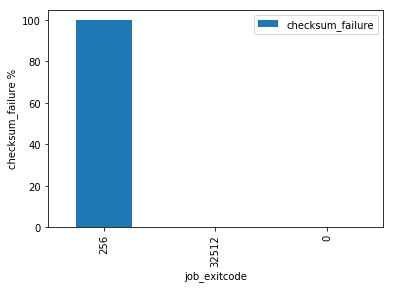

In [22]:
#job exit codes where integrity errors occurred
top_integrity_err_jobtype = df.groupby(["job_exitcode"])["checksum_failure"].agg('sum').apply(lambda x:x/integrity_err_count*100).sort_values(ascending=False)#.filter(lambda x :x["checksum__failure"]!=0)
top_integrity_err_jobtype.plot.bar()
import matplotlib.pyplot as plt  
# # plot between 2 attributes 


plt.xlabel("job_exitcode") 
plt.ylabel("checksum_failure %") 
plt.legend()
plt.show() 
#This chart denotes of all the checksum failure in collected data how many checksum failures had a specific job_exitcode, 


In [23]:
!pip install kmodes
import seaborn as sns

In [0]:
# df.fillna(0,inplace = True)

# df.to_csv('/content/drive/My Drive/Colab Notebooks/ISI/processed_df.csv')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


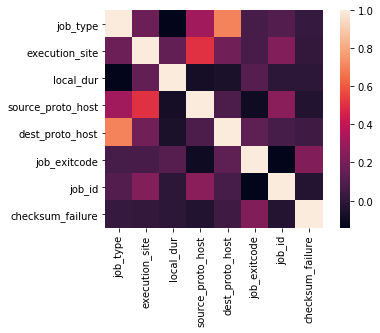

In [26]:
import numpy as np


#plotting heat map to compute correlation between different variables
Sum_of_squared_distances = []
costs= []
X = df[['job_type','execution_site','local_dur','source_proto_host','dest_proto_host','job_exitcode','job_id','checksum_failure']]
X.fillna(0,inplace=True)

# It is required to convert values in string format to numerical categories before using any correlation
X.loc[:,:]=X.apply(lambda x : pd.factorize(x)[0])   

cor = X.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True)


In [27]:

#running clustering on chosen parameters
from kmodes import kmodes
from kmodes.util.dissim import matching_dissim
K = range(1,15)
#choosing subset of variables only
X = X[['job_type','execution_site','local_dur','source_proto_host','dest_proto_host','job_exitcode','job_id']]
kmodes_cao_k = []
for k in K:
    kmodes_cao = kmodes.KModes(n_clusters=k, init='Cao', verbose=1)
    kmodes_cao_k.append(kmodes_cao)
    kmodes_cao.fit_predict(X)
    labels,cost =  kmodes._labels_cost(X, kmodes_cao.cluster_centroids_,matching_dissim)
    costs.append(cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 111537.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 641, cost: 100208.0
Run 1, iteration: 2/100, moves: 0, cost: 100208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4115, cost: 76696.0
Run 1, iteration: 2/100, moves: 119, cost: 76696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1482, cost: 74544.0
Run 1, iteration: 2/100, moves: 30, cost: 74544.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1646, cost: 73927.0
Run 1, iteration: 2/100, moves: 30, cost: 73927.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4238, cost: 64393.0
Run 1, it

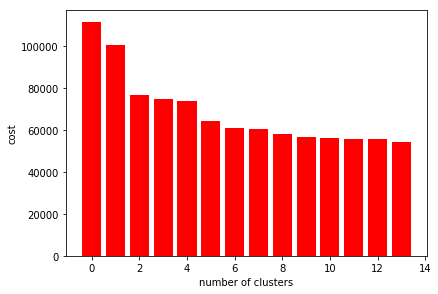

In [29]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.arange(len(costs))
plt.bar(indices, costs,color='r')
#choosing the optimal cost
plt.tight_layout()
plt.xlabel("number of clusters")
plt.ylabel("cost")
plt.show()

,job_type,execution_site,local_dur,source_proto_host,dest_proto_host,job_exitcode,job_id
0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1
4,0,0,2,2,2,0,2


In [0]:
y_kmodes = kmodes_cao_k[2].predict(X)
centroids = kmodes_cao_k[2].cluster_centroids_
labels= kmodes_cao_k[2].labels_

kmodes = pd.DataFrame(labels)
import matplotlib.pyplot as plt

Execution site labels  {3: 'local', 1: 'condor_pool', 0: 'CCG', 2: 'condorpool'}


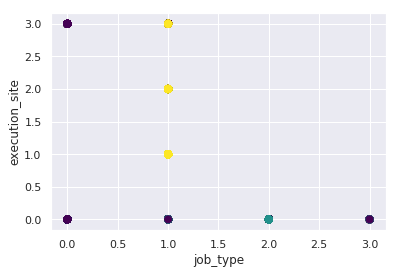

In [34]:
%matplotlib inline

import seaborn as sns; sns.set()
fig = plt.figure()
label_dict=df['execution_site'].astype('category')
label_dict = dict(zip(label_dict.cat.codes,label_dict))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmodes, s=50, cmap='viridis')
# ax.set_yticks(label_dict.keys())
# ax.set_yticklabels(label_dict.values())
ax.set_xlabel('job_type')
ax.set_ylabel('execution_site')
print("Execution site labels ",label_dict)
#plotting the clustering result 
#plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=200, alpha=0.5);

Text(0.5, 0, 'job_type')

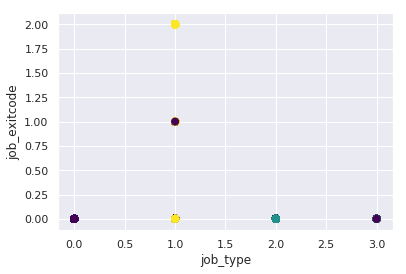

In [36]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 5], c=y_kmodes, s=50, cmap='viridis')
plt.ylabel('job_exitcode')
plt.xlabel('job_type')

In [38]:
checksum_centroids = {0:0,1:0,2:0}

df1 = df[['checksum_failure']]
print(df1.iloc[0,0])
for i in range(len(df)):
  
  if df1.iloc[i,0] == 1:
    checksum_centroids[labels[i]] += 1
                     
  
print(checksum_centroids)  
total_elements = []
for i in range(3):
  checksum_centroids[i] = checksum_centroids[i]
  total_elements.append(sum(labels==i))
  
for i in range(3):
  print("total events in cluster "+str(i),total_elements[i])
  print("total checksum failure events in the cluster "+str(i),checksum_centroids[i])


0
{0: 0, 1: 0, 2: 183}
total events in cluster 0 9997
total checksum failure events in the cluster 0 0
total events in cluster 1 4582
total checksum failure events in the cluster 1 0
total events in cluster 2 11204
total checksum failure events in the cluster 2 183
